# Week 8 - Visualizing Data

matplotlib과 seaborn을 이용하여 데이터를 시각화해보자.

## Weather Data Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
# Load Data
data = pd.read_csv("data/weather-mod.csv")

In [8]:
data.index = data.date
data = data.drop(["date"], axis=1)

In [12]:
data.columns

Index(['max_temp', 'mean_temp', 'min_temp', 'max_dew', 'mean_dew', 'min_dew',
       'max_humidity', 'mean_humidity', 'min_humidity', 'max_pressure',
       'mean_pressure', 'min_pressure', 'max_visibilty', 'mean_visibility',
       'min_visibility', 'max_wind', 'mean_wind', 'min_wind', 'precipitation',
       'cloud_cover', 'events', 'wind_dir', 'rain', 'thunderstorm', 'fog',
       'snow', 'max_tempc', 'min_tempc', 'mean_tempc'],
      dtype='object')

In [13]:
data.head()

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,cloud_cover,events,wind_dir,rain,thunderstorm,fog,snow,max_tempc,min_tempc,mean_tempc
date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,56,40,24,24,20,16,74,50,26,30.53,...,0,NaN,138,False,False,False,False,13.333333,-4.444444,4.444444
2012-03-11,67,49,30,43,31,24,78,53,28,30.37,...,1,Rain,163,True,False,False,False,19.444444,-1.111111,9.444444
2012-03-12,71,62,53,59,55,43,90,76,61,30.13,...,6,Rain,190,True,False,False,False,21.666667,11.666667,16.666667
2012-03-13,76,63,50,57,53,47,93,66,38,30.12,...,0,NaN,242,False,False,False,False,24.444444,10.000000,17.222222
2012-03-14,80,62,44,58,52,43,93,68,42,30.15,...,0,NaN,202,False,False,False,False,26.666667,6.666667,16.666667


### mean_temp와 mean_humidity로 scatterplot 을 그려보자

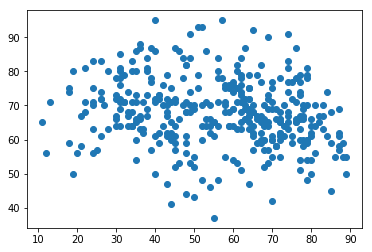

In [14]:
plt.plot('mean_temp', 'mean_humidity', data=data, linestyle='none', marker='o')
plt.show()

### cloud_cover와 mean_temp는 상관관계가 있을까?

c:\users\bumso\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


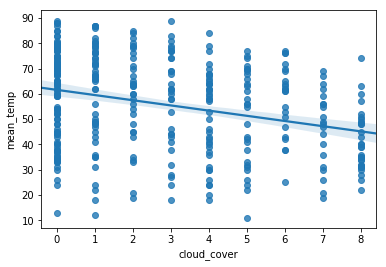

In [15]:
#회귀 분석. 통계적으로 유의미한 기울기인지는 수치를 살펴봐야 함. 
sb.regplot(x=data["cloud_cover"], y=data["mean_temp"])

c:\users\bumso\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


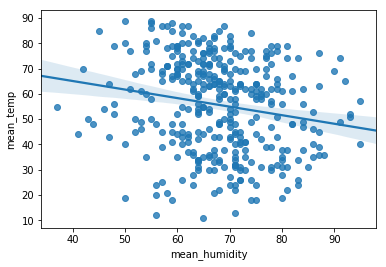

In [17]:
sb.regplot(x=data["mean_humidity"], y=data["mean_temp"])

### 모든 변인들의 상관관계 그래프를 그려보자

In [18]:
sub_data = data[['mean_temp', 'mean_dew', 'mean_humidity', 'min_humidity', 
       'mean_pressure', 'mean_visibility', 'mean_wind', 'precipitation',
       'cloud_cover']]

c:\users\bumso\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


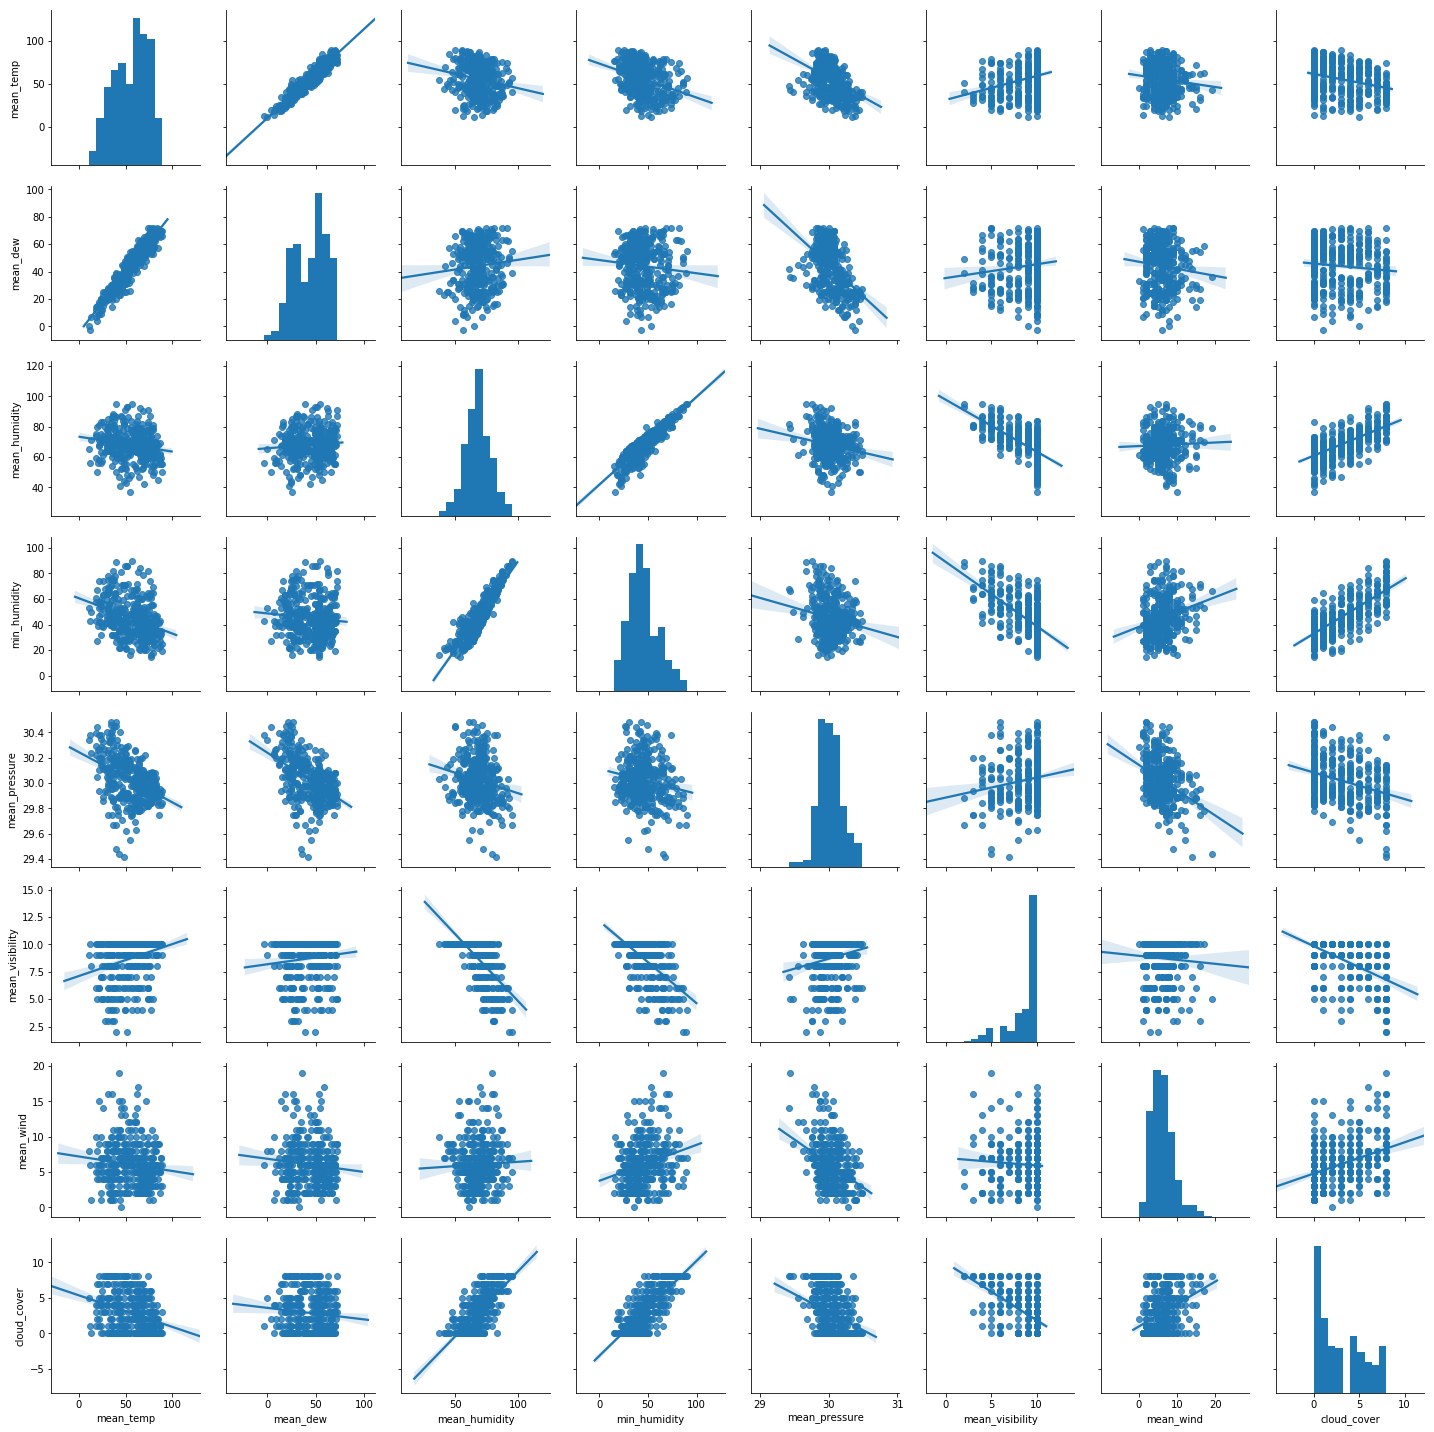

In [19]:
sb.pairplot(sub_data, kind="reg")
plt.show()

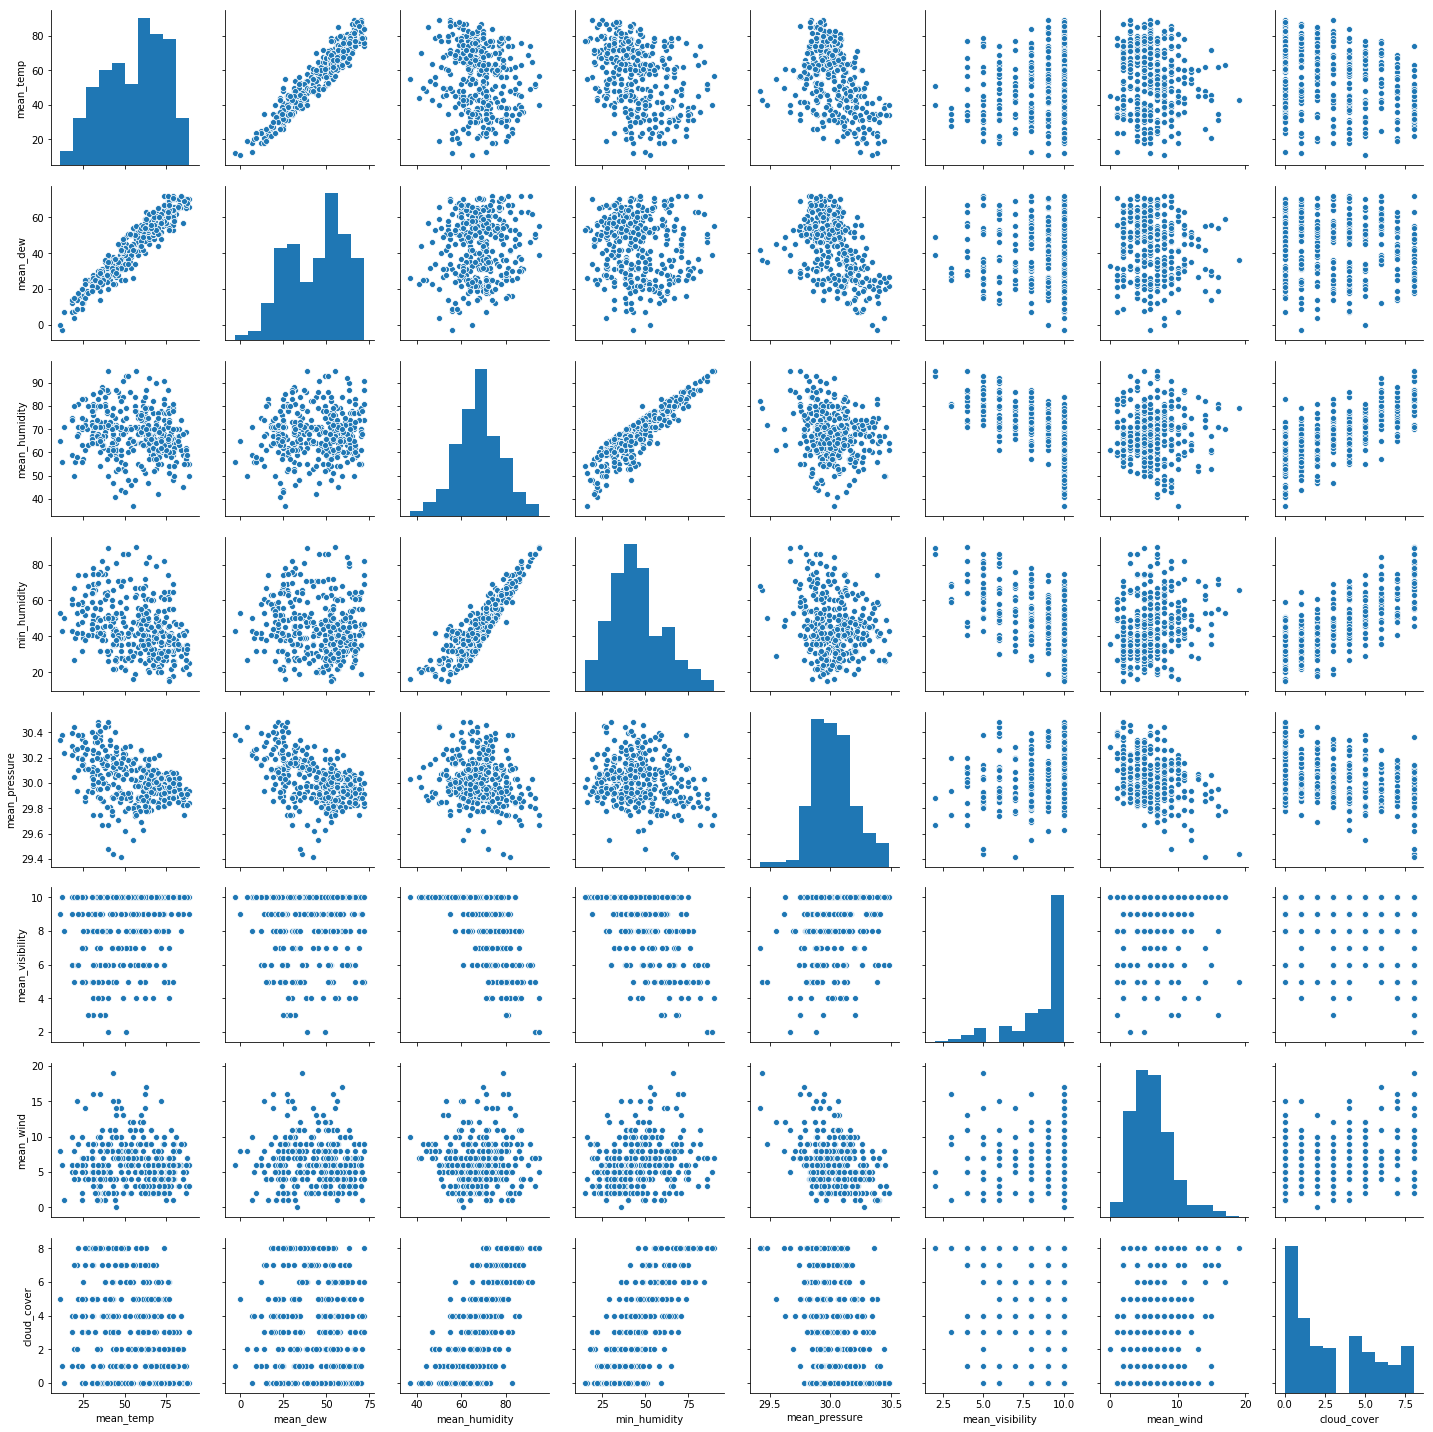

In [20]:
sb.pairplot(sub_data, kind="scatter")
plt.show()

## Gapminder Data Visualization

In [21]:
def read_gapminder_data(filename, colname):
    data = pd.read_csv("data/gapminder/{}".format(filename), header=None)
    data.columns = ["country", colname]
    data.index = data.country
    data = data.drop(['country'], axis=1)
    return data

In [22]:
employment = read_gapminder_data("employment.csv", "employment")
life_exp = read_gapminder_data("life_expectancy.csv", "life_exp")
gdp = read_gapminder_data("gdp_per_capita.csv", "gdp")

In [24]:
frames = [employment, life_exp, gdp]
gm_data = pd.concat(frames, axis=1)

In [26]:
gm_data.head()

,employment,life_exp,gdp
country,,,
Albania,51.400002,74.7,1681.613910
Algeria,50.500000,75.0,2155.485231
Angola,75.699997,57.6,562.987685
Argentina,58.400002,75.4,9388.688523
Armenia,40.099998,72.3,1424.190562


### 변인들 간의 상관관계를 그려보자

c:\users\bumso\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


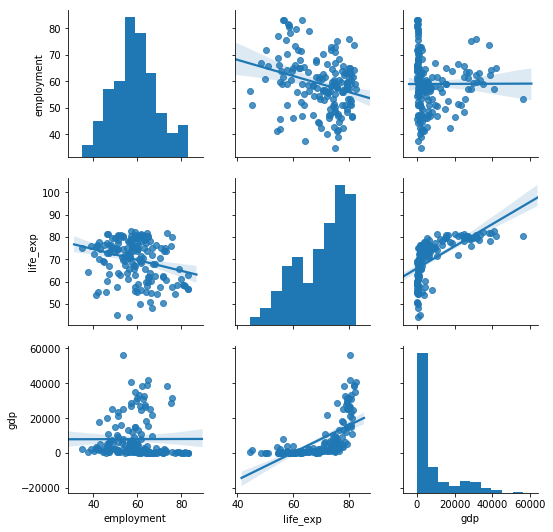

In [27]:
sb.pairplot(gm_data, kind="reg")
plt.show()

### Bubble Graph
Bubble Graph는 세개의 변인을 이용한다.

x, y 이외에 z는 점의 크기로 표현된다..

In [29]:
gm_subset = gm_data.sample(n=50)
x = gm_subset.index
y = gm_subset.life_exp
z = gm_subset.gdp

Text(0.5, 1.0, 'Gapminder - Life Expectancy and GDP')

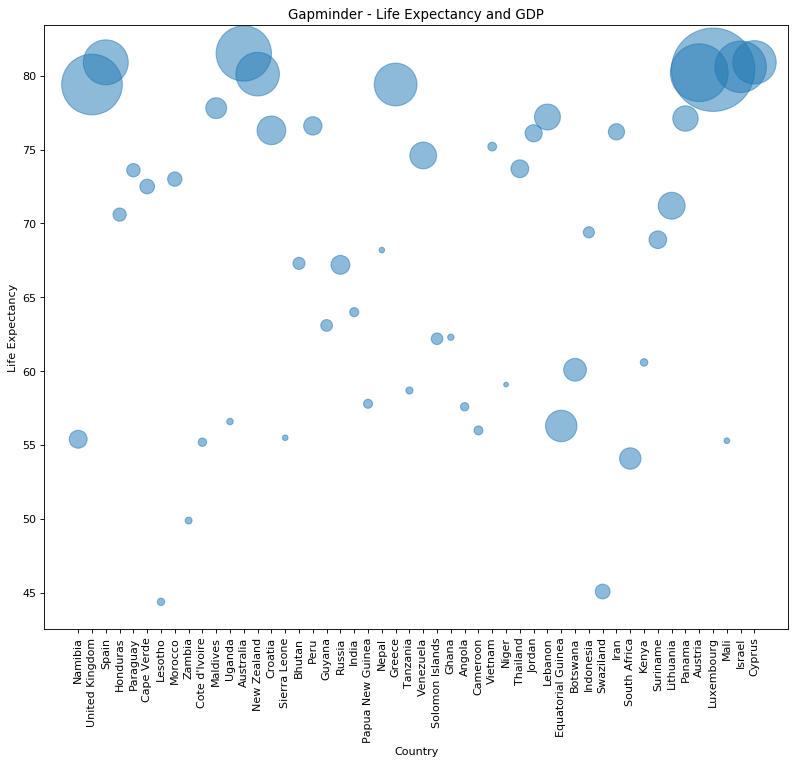

In [42]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='b')

# Change color with c and alpha. I map the color to the X axis value.
#alpha는 투명도
plt.scatter(x, y, s=z/10,alpha=0.5)
 
# Add titles (main and on axis)
plt.xticks(rotation=90) # --> x축 label들 rotation
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.title("Gapminder - Life Expectancy and GDP")

### gdp를 기준으로 sorting 한 후 그래프를 다시 그려보자.

In [44]:
gm_subset_sorted = gm_subset.sort_values(['gdp'], ascending=True)
gm_subset_sorted.head()

,employment,life_exp,gdp
country,,,
Niger,60.400002,59.1,171.421100
Nepal,61.799999,68.2,244.537261
Sierra Leone,63.799999,55.5,251.417017
Mali,45.700001,55.3,258.030507
Ghana,65.099998,62.3,317.736363


In [45]:
x = gm_subset_sorted.index
y = gm_subset_sorted.life_exp
z = gm_subset_sorted.gdp

Text(0.5, 1.0, 'Gapminder - Life Expectancy and GDP')

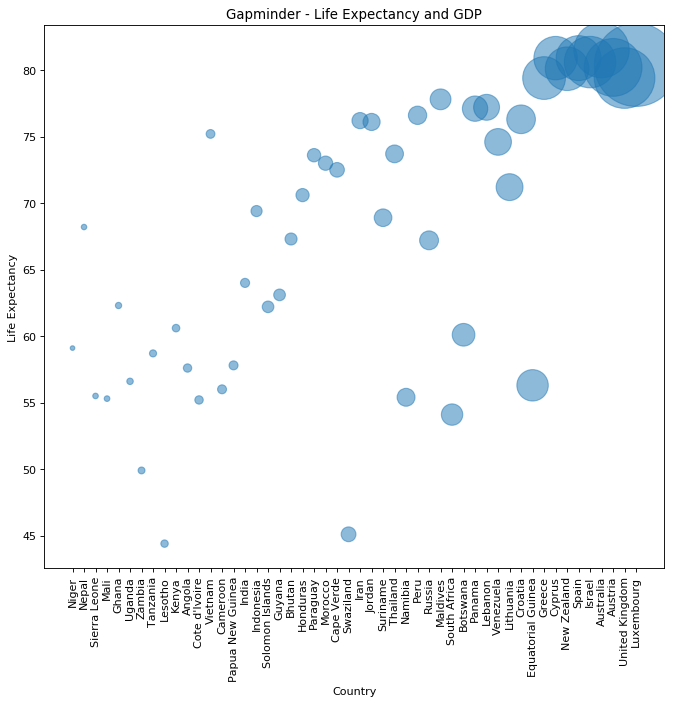

In [48]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 9), dpi=80, facecolor='w', edgecolor='k')

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/10, alpha=0.5)
 
# Add titles (main and on axis)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.title("Gapminder - Life Expectancy and GDP")

### Seaborn 을 이용해서 위이 그래프를 다시 그려보자.

In [50]:
# 삭제했던 "country" 컬럼이 다시 필요.
gm_subset_sorted["country"] = gm_subset_sorted.index

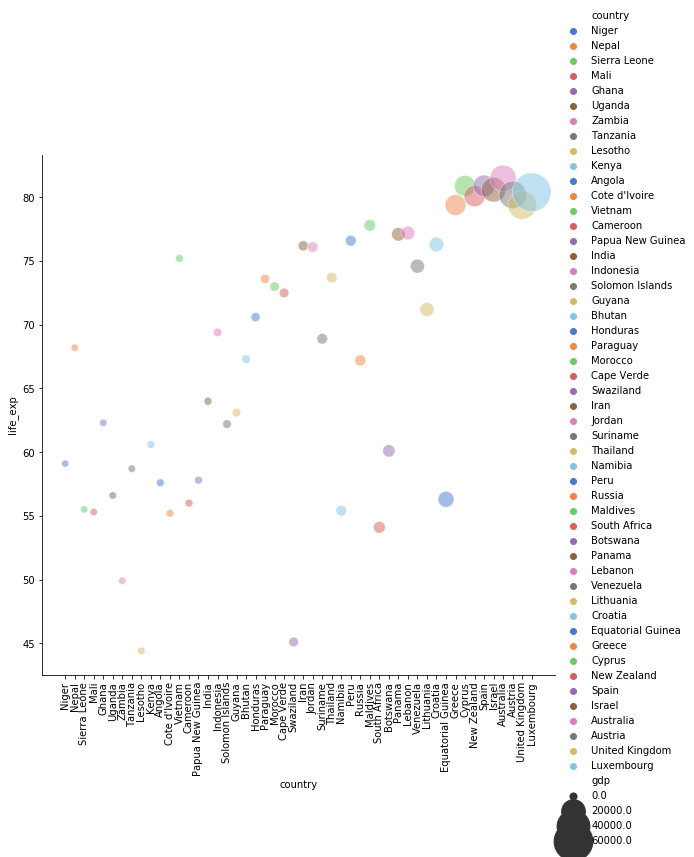

In [56]:
# Plot miles per gallon against horsepower with other semantics
#sizes는 버블의 크기 범위.
bubble = sb.relplot(x="country", y="life_exp", hue="country", size="gdp",
            sizes=(50, 1500), alpha=.5, palette="muted",
            height=8, data=gm_subset_sorted)
bubble.set_xticklabels(rotation=90)
